## Michaud Model

$\frac{\partial RT}{\partial t}=R(RT,RD,F)+D_{RT}\triangle RT$

$\frac{\partial RD}{\partial t}=k_5-k_6RD-R(RT,RD,F)+D_{RD}\triangle RD$

$\frac{\partial F}{\partial t}=k_7+k_8\frac{RT^2}{1+k_9RT^2}-k_{10}dW(\sigma,s)F+D_F\triangle F$

where $R$ is the reaction function:

$R(*)=(k_0+\alpha\frac{k_1RT^3}{1+k_2RT^2})RD-(k_3+k_4(1+\beta)F)RT$

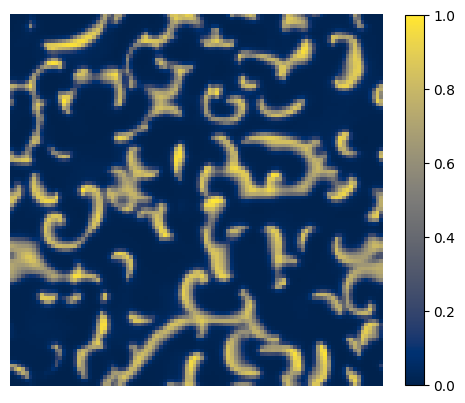

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from pde_utils import correlated_gaussian_field
from pde_utils import periodic_laplacian as laplacian

# define parameters
k0 = 0.00625
k1 = 0.3125
k2 = 1
k3 = 0.0625
k4 = 0.05625
k5 = 0.0625
k6 = 0.02083
k7 = 0.001875
k8 = 0.140625
k9 = 0.25
k10 = 0.025
Drt = 0.08
Drd = 0.4
Df = 0.001
sigma = 0.75
s = 4 
f = 10 # dW update frequency
alpha = 1
beta = 1

size = 100 # number of cells
dt = 0.01  # time step
t = 1000.0 # run time
frame_int = 25 # animation frame interval

# set initial concentrations
RT = 0.1+0.9*np.random.rand(size,size)
RD = np.full((size, size),0.1)
F = np.full((size, size),0)

# set initial stochastic noise term
dW = correlated_gaussian_field(sigma,s,(size,size),1.0)

# define reaction function
def R(A,B,C):
    return (k0 + alpha*k1*A**3/(1 + k2*A**2))*B - (k3 + k4*(1 + beta)*C)*A

# set up figure
fig, ax = plt.subplots(figsize=(6,6))
ax.axis('off')
frames = []

# create colorbar
im = ax.imshow(RT, cmap='cividis', vmin=0, vmax=1, animated=True)
fig.colorbar(im, ax=ax, shrink=0.8)

# simulate the PDE with finite difference method
for i in range(int(t/dt)):

    # update concentrations
    RT = RT + dt * (R(RT,RD,F) + Drt*laplacian(RT))
    RD = RD + dt * (k5 - k6*RD - R(RT,RD,F) + Drd*laplacian(RD))
    F = F + dt * (k7 + k8*RT**2 / (1 + k9*RT**2) - k10*dW*F + Df*laplacian(F))

    # update stocastic noise term every f seconds
    if i % int(f/dt) == 0:
        dW = correlated_gaussian_field(sigma,s,(size,size),1.0)

    # capture a frame every frame_int seconds
    if i % int(frame_int/dt) == 0:
        frames.append([ax.imshow(RT, cmap='cividis', animated=True)])

# save animation
animation.ArtistAnimation(fig, frames, interval=50, blit=True).save('animations/michaud.gif', writer=PillowWriter(fps=10))